In [136]:
import re
import sys
import json
import csv
from xml.sax.saxutils import escape
import networkx as nx
from itertools import combinations
import time
from matplotlib import pyplot as plt
from operator import itemgetter


def parsecsv():
    with open('ARCSLiterature.csv', 'r') as thefile:
        data = csv.DictReader(thefile, delimiter=',', quotechar='"')
        datadict = {}
        for row in data:
            if escape(row['Title']) not in datadict:
                datadict[row['Title']] = [row['Author'],
                                                 row['Publication Year'],
                                                 row['Publication Title'],
                                                 row['Issue'],
                                                 row['Volume'],
                                                 row['DOI'],
                                                 row['Abstract Note'],
                                                 row['Manual Tags']
                                          ]

            else:
                continue
        return datadict


valueslist = []

xmloutputfile = open('../../publications/fixtures/publications.xml', 'w')
xmloutputfile.write('''<?xml version="1.0" encoding="utf-8"?>''')
xmloutputfile.write('''<django-objects>''')

keyworddict = {}

counter = 1


In [142]:



#for k in keywordset:
#    cooccurrence = list(combinations(k, 2))
#    for c in cooccurrence:
#        edgelist.append(c)

def getkwgraph(kw):
    G = nx.Graph()
    combolist = []
    
    for k, v in parsecsv().items():
        keywordset = []
        if len(v[7]) > 1:
            for keyword in v[7].split("; "):
                if keyword.lower() not in ["citizen science", "newtech"]:
                    keywordset.append(keyword.lower())
            if kw in keywordset:
                print(k)
                for combo in combinations(keywordset, 2):
                    combolist.append(combo)
                   
                    print(combo)
            #keyword.append(keywordset)
    for combination in combolist:

        
     
        G.add_edge(combination[0],combination[1])

  
    



    # Create a BA model graph
    # find node with largest degree
    node_and_degree = G.degree()
    (largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]
    # Create ego graph of main hub
    hub_ego = nx.ego_graph(G, largest_hub)
    # Draw graph
    pos = nx.spring_layout(hub_ego)
    nx.draw(hub_ego, pos, node_color='b', node_size=50, with_labels=True)
    # Draw ego as large and red
    nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], node_size=300, node_color='r')
    plt.show()

Citizen science as a tool for conservation in residential ecosystems
('urban ecology', 'nottech')
('urban ecology', 'cumulative effects')
('urban ecology', 'residential landscapes')
('nottech', 'cumulative effects')
('nottech', 'residential landscapes')
('cumulative effects', 'residential landscapes')
Differential responses of cryptic bat species to the urban landscape
('conservation', 'bats')
('conservation', 'cryptic species')
('conservation', 'land use')
('conservation', 'population trends')
('conservation', 'urban ecology')
('conservation', 'bats')
('bats', 'cryptic species')
('bats', 'land use')
('bats', 'population trends')
('bats', 'urban ecology')
('bats', 'bats')
('cryptic species', 'land use')
('cryptic species', 'population trends')
('cryptic species', 'urban ecology')
('cryptic species', 'bats')
('land use', 'population trends')
('land use', 'urban ecology')
('land use', 'bats')
('population trends', 'urban ecology')
('population trends', 'bats')
('urban ecology', 'bats')
G

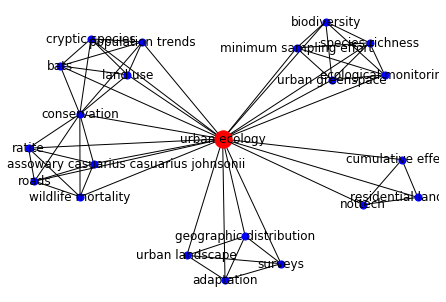

0.2673664093017578


In [150]:
start = time.time()            
getkwgraph("urban ecology")
end = time.time()
print(end - start)
